In [34]:
# import the necessary packages
from keras.models import model_from_json
from keras.optimizers import SGD
from time import sleep
from scipy.ndimage import zoom
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# reading model architecture and loading weights, compiling Model with Stotastic Gradient Descent optimizer

model = model_from_json(open('models/Face_model_architecture.json').read())
model.load_weights('models/Face_model_weights.h5')
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

In [36]:

def extract_face_features(gray, detected_face, offset_coefficients):
        (x, y, w, h) = detected_face
        #print x , y, w ,h
        horizontal_offset = np.int(np.floor(offset_coefficients[0] * w))
        vertical_offset = np.int(np.floor(offset_coefficients[1] * h))

        extracted_face = gray[y+vertical_offset:y+h, 
                          x+horizontal_offset:x-horizontal_offset+w]
        #print extracted_face.shape
        new_extracted_face = zoom(extracted_face, (48. / extracted_face.shape[0], 
                                               48. / extracted_face.shape[1]))
        new_extracted_face = new_extracted_face.astype(np.float32)
        new_extracted_face /= float(new_extracted_face.max())
        return new_extracted_face

In [37]:
def detect_face(frame):
        cascPath = "models/haarcascade_frontalface_default.xml"
        faceCascade = cv2.CascadeClassifier(cascPath)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        detected_faces = faceCascade.detectMultiScale(
                gray,
                scaleFactor=1.1,
                minNeighbors=6,
                minSize=(48, 48),
                flags=cv2.FONT_HERSHEY_SIMPLEX
            )
        return gray, detected_faces

In [38]:
image = cv2.imread("test_images/example_03.jpg")
image = cv2.resize(image,None,fx=0.6,fy=0.6)

In [39]:
gray, detected_faces = detect_face(image)


#print(type(gray))
#face_index = 0
    

In [40]:
# predict output
for face in detected_faces:
    (x, y, w, h) = face
    

    if w > 10:
        # draw rectangle around face 
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
        
        # extract features
        extracted_face = extract_face_features(gray, face, (0.055, 0.03)) #(0.075, 0.05)
        #print(type(frame))
        # predict smile
        prediction_result = model.predict_classes(extracted_face.reshape(1,48,48,1))

        # draw extracted face in the top right corner
        #frame[face_index * 48: (face_index + 1) * 48, -49:-1, :] = cv2.cvtColor(extracted_face * 255, cv2.COLOR_GRAY2RGB)

        # annotate main image with a label
        if prediction_result == 0 :
            cv2.putText(image, "Angry", (x,y),cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            print("Prediction : Angry")
            
        elif prediction_result == 1:
            cv2.putText(image, "Disgust", (x,y) ,cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            print("Prediction : Disgust")

        elif prediction_result == 2:
            cv2.putText(image, "Fear", (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            print("Prediction : Fear")

        elif prediction_result == 3:
            cv2.putText(image, "Happy", (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            print("Prediction : Happy")

        elif prediction_result == 4:
            cv2.putText(image, "Sad", (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            print("Prediction : Sad")

        elif prediction_result == 5:
            cv2.putText(image, "Surprise",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            print("Prediction : Surprise")

        else:
            cv2.putText(image, "Neutral", (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            print("Prediction : Neutral")

        
        # increment counter
        #face_index += 1

Prediction : Surprise


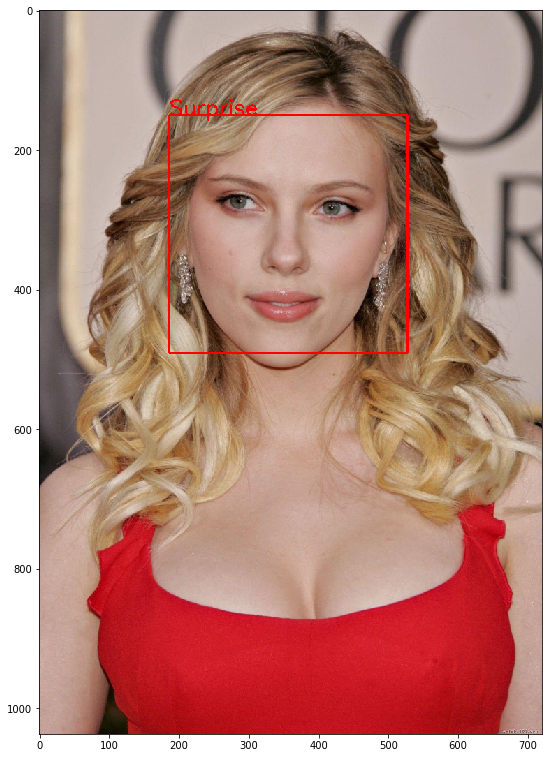

In [41]:
# Displaying the resulting image

plt.figure(figsize=(9,16))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(image)
plt.show()

#cv2.imshow("Image", frame)  

#cv2.waitKey(0) 

# When everything is done, release the capture